In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['font.family']=['Arial Unicode MS']

In [3]:
from PIL import Image,ImageFont,ImageDraw
import os
import imageio

In [4]:
def make_gif(up):
    filelist = []  
    root = os.getcwd()
    pathr = os.path.join(root, up)
    files = os.listdir(pathr)
    for f in files:  
        if(os.path.isfile(pathr + '/' + f)):
            if (os.path.splitext(f)[1] == ".png"):
                filelist.append(f)
    ff = sorted(filelist)
    for _ in range(5):
        ff.append(ff[-1])
    images = []
    for f in ff:
        images.append(imageio.imread(os.path.join(pathr, f)))
    imageio.mimsave(os.path.join(pathr, 'res.gif'), images, duration=0.5)

In [5]:
# x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
#                     [9.779], [6.182], [7.59], [2.167], [7.042], 
#                     [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

# y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
#                     [3.366], [2.596], [2.53], [1.221], [2.827], 
#                     [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [6]:
x_train = np.sort(np.random.randn(20)).reshape(-1, 1).astype(np.float32)
y_train = np.sort(np.random.randn(20)).reshape(-1, 1).astype(np.float32)

In [7]:
X = x_train.reshape(-1, )
Y = y_train.reshape(-1, )
A = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, Y, rcond=-1)[0]

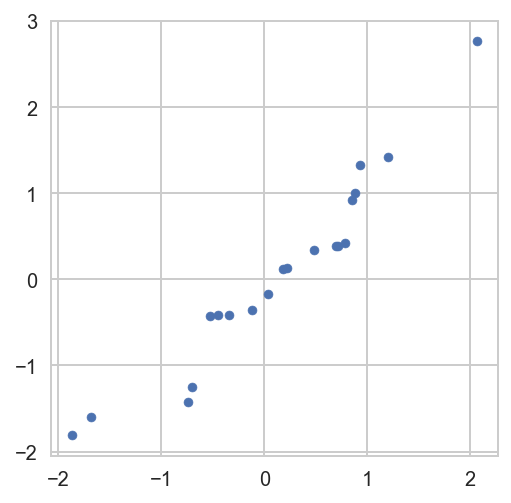

In [8]:
plt.scatter(x_train, y_train, s=20)

In [9]:
# Hyper-paramaters
input_size = 1
output_size = 1
num_epochs = 200
learning_rate = 0.01

In [10]:
model = nn.Linear(input_size, output_size)

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

In [13]:
for epoch in range(1, num_epochs + 1):
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        info = "{}/{} Loss: {}".format(epoch, num_epochs, loss.item())
        print(info)
        w, b = [a.item() for a in model.parameters()]
        plt.plot(x_train, w * x_train + b, label='Fitted line')
        plt.plot(x_train, m * x_train + c, linestyle="--", c="red", label='LSTSQ')
        plt.scatter(x_train, y_train, c="green", s=20, label='Original data')
        plt.legend()
        name = "pic/{:03d}.png".format(epoch)
        plt.savefig(name)
        plt.close()
        im = Image.open(name)
        draw = ImageDraw.Draw(im)
        newfont = ImageFont.truetype("Arial.ttf", 20)
        draw.text((0,0), info, (0,0,0), font=newfont)
        im.save(name)
        # plt.show()

5/200 Loss: 2.4084811210632324
10/200 Loss: 2.053957462310791
15/200 Loss: 1.7536132335662842
20/200 Loss: 1.4991307258605957
25/200 Loss: 1.283476710319519
30/200 Loss: 1.1007020473480225
35/200 Loss: 0.9457743167877197
40/200 Loss: 0.8144348859786987
45/200 Loss: 0.7030797600746155
50/200 Loss: 0.6086578369140625
55/200 Loss: 0.5285859704017639
60/200 Loss: 0.4606766700744629
65/200 Loss: 0.40307721495628357
70/200 Loss: 0.35421809554100037
75/200 Loss: 0.3127695322036743
80/200 Loss: 0.2776049077510834
85/200 Loss: 0.24776914715766907
90/200 Loss: 0.22245310246944427
95/200 Loss: 0.2009705901145935
100/200 Loss: 0.1827399879693985
105/200 Loss: 0.16726812720298767
110/200 Loss: 0.1541367471218109
115/200 Loss: 0.14299124479293823
120/200 Loss: 0.13353081047534943
125/200 Loss: 0.12550027668476105
130/200 Loss: 0.11868321895599365
135/200 Loss: 0.11289606988430023
140/200 Loss: 0.10798297822475433
145/200 Loss: 0.10381180793046951
150/200 Loss: 0.10027038305997849
155/200 Loss: 0.097

In [14]:
make_gif("pic")